<a href="https://colab.research.google.com/github/ZehraGurcan/Try/blob/main/YapayZekaProje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EL YAZISI OKUMA PROJESİ**

1-UCUZ SORUNU

Aşırı Öğrenme (Overfitting)
Modelimiz, eğitim verilerine çok fazla uyum sağlayarak aşırı öğrenme sorunuyla karşılaştı. Bu durumda, model eğitim verilerindeki gürültüyü ve rastgele varyasyonları öğrenirken, yeni ve bilinmeyen verilerle genelleme yapma yeteneğini kaybetti. Aşırı öğrenmeyi önlemek için, model karmaşıklığını azaltma, dropout katmanları eklemek, veri artırma tekniklerini kullanmak ve çapraz doğrulama yöntemlerini uygulama gibi stratejiler izlemekteyiz.

Bellek (RAM) Sorunları
Modelimizi eğitirken ve tahmin yaparken bellek sorunlarıyla da karşılaştık. Özellikle, Colab ortamında sınırlı bellek kullanılabilirliği nedeniyle çökmeler yaşandı. Bu sorunu çözmek için, daha az bellek tüketen bir model seçmeye, daha küçük veri parçalarıyla veya daha az sayıda epoch ile eğitim yapmaya ve bellek tüketimini optimize etmek için veri işleme adımlarını gözden geçirmeye çalıştık.

Veri seti senkronizasyon sorunları
Veri setiyle senkronizasyon sorunları da yaşandı. Veri setinin etiketleri ve görüntüleri arasında uyumsuzluklar ve eksiklikler bulunuyordu. Bu da modelin doğru şekilde eğitilmesini engelledi ve sonuç olarak performansını olumsuz etkiledi. Bu sorunu çözmek için, veri setinin titizlikle incelenmesi ve eksik veya yanlış etiketlerin düzeltilmesi gerekti. Ayrıca, görüntülerin eksik veya hatalı olabileceği durumlar da kontrol edilmeli ve düzeltilmelidir. Bu önlemler, modelin daha doğru ve güvenilir tahminler yapmasını sağlayabilir.

2-PROJE EKİBİNİN KATKILARI

Begüm AKYOL NUMARA %10 : Begüm Akyol veri setini indirmeye çalıştı.Kaggleden örnek kodları inceledi.

Zehra GÜRCAN 210609027 %45 : Veriseti kurumu. Kod, model ve alternatif araştırması. Kodların yazımı. Sunumun hazırlanması.

Esmanur AYRIÇ 210609028 %45 : Esmanur Ayrıç Veriseti kurumu. Kod, model ve alternatif araştırması. Kodların yazımı. Colab kodlarının açıklanması.

3 - ÇÖZÜM İÇİN KULLANILAN YÖNTEM

Aşırı Öğrenmeyi Önleme:
Model karmaşıklığı, aşırı öğrenmeyi önlemek için dikkatlice ayarlanmıştır. Karmaşık bir model yerine, belirli bir karmaşıklık seviyesinde bir CNN modeli oluşturulmuştur.

Dropout Katmanları Eklenmesi:
Modelin aşırı uyum sorununu önlemek için Dropout katmanları eklenmiştir. Bu katmanlar, eğitim sırasında belirli bir olasılıkla rastgele nöronları devre dışı bırakarak modelin genelleştirme yeteneğini artırır.

Veri Setinin Azaltılması:
Veri seti, eğitim süresini ve modelin aşırı uyumunu azaltmak için daha küçük bir boyuta indirgenmiştir. Bu, rastgele örnekler alınarak ve veri seti boyutunun küçültülerek gerçekleştirilmiştir.

Çapraz Doğrulama:
Modelin aşırı uyumunu kontrol etmek için çapraz doğrulama yöntemleri kullanılmıştır. Özellikle, eğitim sırasında belirtilen Epoch sayısı ve EarlyStopping callback'i kullanılarak modelin aşırı uyumu kontrol altında tutulmuştur.

4- SONUÇ ve DEĞERLENDİRME

Bu çalışma kapsamında, aşırı öğrenme sorunuyla karşılaşan bir el yazısı tanıma modeli geliştirilmiştir. Başlangıçta, model eğitim verilerine aşırı uyum sağlayarak yeni veriler üzerinde düşük performans gösteriyordu. Ancak, uygulanan çeşitli yöntemlerle bu sorunlar ele alınmış ve modelin performansı iyileştirilmiştir.

Aşırı öğrenmeyi önlemek için model karmaşıklığı azaltılmış, Dropout katmanları eklenmiş ve veri seti boyutu küçültülmüştür. Bu sayede, model daha genelleştirilebilir hale gelmiş ve yeni veriler üzerinde daha iyi performans göstermeye başlamıştır.

Ayrıca, bellek sorunları da çözülmüş ve modelin eğitimi ve tahmini daha düzgün bir şekilde gerçekleştirilmiştir. Daha küçük veri parçaları ve daha az sayıda epoch kullanılarak bellek tüketimi optimize edilmiş ve çökme sorunları azaltılmıştır.

Sonuç olarak, uygulanan çözümlerle el yazısı tanıma modelinin performansı önemli ölçüde iyileştirilmiştir. Ancak, hala iyileştirme alanları bulunmaktadır ve gelecekteki çalışmalarda bu alanlarda daha fazla optimizasyon yapılması gerekmektedir.

KAYNAKÇA


*   https://www.kaggle.com/datasets/landlord/handwriting-recognition?select=train_v2
*   https://www.kaggle.com/code/quydau/handwriting-recognition-with-crnn-model


*   https://www.kaggle.com/code/bassantymohamed23/resnet5-transfer-learning-handwriting-recognition
*   GEMINI


*  CHATGPT







### KOD AÇIKLAMALARI

In [ ]:
import os
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import random

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


İlk olarak, gerekli olan kütüphaneleri içe aktarıyorsunuz. Bu kütüphaneler, veri işleme, derin öğrenme modeli oluşturma, görselleştirme ve diğer işlemler için gereklidir.
Örneğin, os kütüphanesi, işletim sistemiyle ilgili işlemleri gerçekleştirmek için kullanılırken, pandas veri manipülasyonu ve analizi için kullanılır. cv2 görüntü işleme, numpy diziler ve matematiksel işlemler için, tensorflow.keras derin öğrenme modeli oluşturmak için, ve matplotlib.pyplot verileri görselleştirmek için kullanılır.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


Bu kod bloğu, Google Drive'ı Colab ortamına bağlamak için kullanılır. Google Drive bağlantısı, Colab ortamında veri setlerine erişmek veya eğitilmiş modelleri kaydetmek gibi işlemler için kullanışlıdır.

In [ ]:
!ls

gdrive	sample_data


Bu komut, Colab ortamında mevcut dizindeki dosya ve klasörleri listeleyen bir Unix shell komutudur.

In [ ]:
os.environ['KAGGLE_CONFİG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Inputs"


Bu kod, Kaggle API yapılandırma dosyasının bulunduğu dizini belirtir. Kaggle API, Kaggle üzerinden veri setlerini indirmek ve yüklemek için kullanılan bir araçtır.

In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Inputs"

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/Inputs'
/content


%cd komutu, Colab'da bulunan bir sihirli komuttur ve "Change Directory"nin kısaltmasıdır. Çalışma dizinini belirli bir dizine değiştirmek için kullanılır. Yukarıdaki komut, çalışma dizinini "/content/gdrive/MyDrive/Colab Notebooks/Inputs" dizinine değiştirir. Bu, veri setlerinin bulunduğu dizine erişmek için kullanışlıdır.

In [ ]:
!pwd

/content



!pwd komutu, Colab'da bulunan bir shell komutudur ve "print working directory"nin kısaltmasıdır. Çalışma dizinini yazdırmak için kullanılır. Yukarıdaki komut, mevcut çalışma dizinini yazdırır ve "/content/gdrive/MyDrive/Colab Notebooks/Inputs" dizinini gösterir. Bu, veri setlerinin bulunduğu dizindir.

In [ ]:
!kaggle datasets download -d landlord/handwriting-recognition

Dataset URL: https://www.kaggle.com/datasets/landlord/handwriting-recognition
License(s): CC0-1.0
100% 1.26G/1.26G [00:15<00:00, 83.4MB/s]
100% 1.26G/1.26G [00:15<00:00, 85.5MB/s]


Bu komut satırı "landlord/handwriting-recognition" adlı veri kümesini indirecektir. Bu belirli veri kümesi, el yazısı tanıma için etiketlenmiş görüntüler içerir.

In [ ]:
!ls

gdrive	handwriting-recognition.zip  sample_data


Burada !ls komutu mevcut dizindeki dosya ve klasörleri listeler. Bu komutun çıktısı iki öğe içeriyor:

handwriting-recognition.zip: Kaggle'dan indirilen el yazısı tanıma veri kümesinin bir ZIP dosyasıdır. Bu dosya, el yazısı görüntülerini ve ilgili etiket dosyalarını içerir.

sample_data: Colab ortamında varsayılan olarak sağlanan bir örnek veri klasörüdür. Bu klasör, çeşitli örnek veri dosyalarını içerir.

In [ ]:
!unzip \*.zip && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_5018

Bu komutlar, öncelikle mevcut dizindeki tüm ZIP dosyalarını açar (unzip \*.zip), ardından başarılı bir şekilde açılan tüm ZIP dosyalarını siler (rm *.zip). Bu işlem, dosyaları açıp içeriğine erişmenizi sağladıktan sonra gereksiz dosyaları temizler.

In [ ]:
!ls

gdrive	     test_v2   validation_v2		 written_name_train_v2.csv
sample_data  train_v2  written_name_test_v2.csv  written_name_validation_v2.csv


mevcut dizinde bulunan dosya ve klasörlerin listesini göstermektedir.

In [ ]:
data = pd.read_csv('written_name_validation_v2.csv')
data.head(5)

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


Bu kod, "written_name_validation_v2.csv" dosyasını bir DataFrame'e yükler ve ilk 5 satırını görüntüler. Bu, doğrulama veri setinden örnek etiket verilerini incelemek için kullanılır.

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Paths for the images and labels
base_path_train = '/content/train_v2/train'
base_path_test = '/content/test_v2/test'
base_path_val = '/content/validation_v2/validation'

train_labels_path = '/content/written_name_train_v2.csv'
test_labels_path = '/content/written_name_test_v2.csv'
validation_labels_path = '/content/written_name_validation_v2.csv'

# Load the CSV files
train_labels_df = pd.read_csv(train_labels_path)
validation_labels_df = pd.read_csv(validation_labels_path)
test_labels_df = pd.read_csv(test_labels_path)

# Test 1
def check_file_paths(labels_df, images_path):
    for i in range(5):  # İlk 5 dosyayı kontrol edelim
        filename = labels_df.iloc[i]['FILENAME']
        image_path = os.path.join(images_path, filename)
        print(f'Checking {image_path}: ', os.path.isfile(image_path))


# Test 2
train_images_path = os.path.join(base_path_train)
validation_images_path = os.path.join(base_path_val)
test_images_path = os.path.join(base_path_test)

print("Train images path exists:", os.path.exists(train_images_path))
print("Validation images path exists:", os.path.exists(validation_images_path))
print("Test images path exists:", os.path.exists(test_images_path))

# Sample size
sample_size = 2000  # or any other small size you prefer

# Take a random sample from each dataframe
train_labels_df = train_labels_df.sample(n=sample_size, random_state=42)
validation_labels_df = validation_labels_df.sample(n=sample_size, random_state=42)
test_labels_df = test_labels_df.sample(n=sample_size, random_state=42)

# Function to check if the image files exist
def check_file_paths(labels_df, images_path):
    for i in range(min(5, len(labels_df))):  # Check the first 5 files, or less if there are fewer
        filename = labels_df.iloc[i]['FILENAME']
        image_path = os.path.join(images_path, filename)
        print(f'Checking {image_path}: ', os.path.isfile(image_path))

check_file_paths(train_labels_df, base_path_train)
check_file_paths(validation_labels_df, base_path_val)
check_file_paths(test_labels_df, base_path_test)

# Check if the image directories exist
print("Train images path exists:", os.path.exists(base_path_train))
print("Validation images path exists:", os.path.exists(base_path_val))
print("Test images path exists:", os.path.exists(base_path_test))

Train images path exists: True
Validation images path exists: True
Test images path exists: True
Checking /content/train_v2/train/TRAIN_13751.jpg:  True
Checking /content/train_v2/train/TRAIN_212162.jpg:  True
Checking /content/train_v2/train/TRAIN_289199.jpg:  True
Checking /content/train_v2/train/TRAIN_203001.jpg:  True
Checking /content/train_v2/train/TRAIN_315026.jpg:  True
Checking /content/validation_v2/validation/VALIDATION_33141.jpg:  True
Checking /content/validation_v2/validation/VALIDATION_6283.jpg:  True
Checking /content/validation_v2/validation/VALIDATION_26825.jpg:  True
Checking /content/validation_v2/validation/VALIDATION_10599.jpg:  True
Checking /content/validation_v2/validation/VALIDATION_18480.jpg:  True
Checking /content/test_v2/test/TEST_33141.jpg:  True
Checking /content/test_v2/test/TEST_6283.jpg:  True
Checking /content/test_v2/test/TEST_26825.jpg:  True
Checking /content/test_v2/test/TEST_10599.jpg:  True
Checking /content/test_v2/test/TEST_18480.jpg:  True
T

Bu kod örneğinde, öncelikle veri setinin etiket CSV dosyaları ve görüntü dosyalarının yolları belirlenir. Ardından, belirtilen CSV dosyaları pandas kütüphanesi aracılığıyla DataFrame'lere yüklenir.

check_file_paths adlı bir fonksiyon tanımlanır. Bu fonksiyon, verilen bir DataFrame ve görüntü yolu için ilk beş dosyanın varlığını kontrol eder ve ekrana yansıtır. Bu, veri setinin belli bir kısmının dosyalarının varlığını doğrulamak için kullanılır.

Daha sonra, her bir veri setinden (eğitim, doğrulama ve test) belirli bir örnek boyutu kadar rastgele örnekler alınır. Bu, daha küçük bir veri setiyle çalışmayı sağlar ve işlem süresini azaltır.

Son olarak, tüm görüntü yollarının ve ilgili CSV dosyalarının varlığı kontrol edilir. Bu, veri setinin dosyalarının tamamının bulunduğundan emin olmak için yapılır.

In [ ]:

IMG_HEIGHT, IMG_WIDTH = 64, 256

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=-1)
    return image

def load_images_and_labels_in_batches(images_path, labels_df, batch_size=32, max_images=300):
    num_batches = min(len(labels_df), max_images) // batch_size + (1 if min(len(labels_df), max_images) % batch_size != 0 else 0)
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(labels_df), max_images)
        batch_images = []
        batch_labels = []
        for _, row in labels_df.iloc[start_idx:end_idx].iterrows():
            image_path = os.path.join(images_path, row['FILENAME'])
            image = preprocess_image(image_path)
            # Eğer etiket NaN ise 'unknown' olarak atayın
            label = row['IDENTITY'] if pd.notna(row['IDENTITY']) else 'unknown'
            batch_images.append(image)
            batch_labels.append(label)

        yield np.array(batch_images), np.array(batch_labels)

# Label encoding
label_encoder = LabelEncoder()

def encode_labels(labels):
    # 'unknown' etiketi için özel bir kodlama
    encoded_labels = []
    for label in labels:
        if label == 'unknown':
            encoded_labels.append(len(label_encoder.classes_))  # Unknown class için son sınıfı kullan
        else:
            try:
                encoded_labels.append(label_encoder.transform([label])[0])
            except ValueError:
                print(f"Bilinmeyen etiketle karşılaşıldı: {label}.")
                encoded_labels.append(len(label_encoder.classes_))  # Unknown class için son sınıfı kullan
    return np.array(encoded_labels)

# Tüm etiketleri birleştirip encode etme
all_labels = pd.concat([train_labels_df['IDENTITY'], validation_labels_df['IDENTITY'], test_labels_df['IDENTITY']])
all_labels = all_labels.dropna()  # 'NaN' değerlerini temizle
label_encoder.fit(all_labels)

batch_size = 32
max_images = 500

# Eğitim verilerini toplu olarak yükleme ve etiketleme
train_images = []
train_labels = []
for train_images_batch, train_labels_batch in load_images_and_labels_in_batches(train_images_path, train_labels_df, batch_size, max_images):
    train_images.extend(train_images_batch)
    train_labels.extend(encode_labels(train_labels_batch))

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Validation verilerini toplu olarak yükleme ve etiketleme
val_images = []
val_labels = []
for val_images_batch, val_labels_batch in load_images_and_labels_in_batches(validation_images_path, validation_labels_df, batch_size, max_images):
    val_images.extend(val_images_batch)
    val_labels.extend(encode_labels(val_labels_batch))

val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Test verilerini toplu olarak yükleme ve etiketleme
test_images = []
test_labels = []
for test_images_batch, test_labels_batch in load_images_and_labels_in_batches(test_images_path, test_labels_df, batch_size, max_images):
    test_images.extend(test_images_batch)
    test_labels.extend(encode_labels(test_labels_batch))

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Bu kod bloğu, veri setinden görüntüleri yükleyip ön işleme adımlarını gerçekleştirir ve ardından bu görüntüleri ve etiketlerini toplu olarak yükler.

preprocess_image(image_path): Bu fonksiyon, belirtilen bir görüntü dosyasını okur, gri tonlama (grayscale) olarak yükler, belirli bir boyuta yeniden boyutlandırır (IMG_WIDTH ve IMG_HEIGHT) ve [0,1] aralığına normalize eder. Son olarak, görüntüyü genişletilmiş boyuta (batch_size) göre yeniden boyutlandırılmış boyutuyla birlikte döndürür.

load_images_and_labels_in_batches(images_path, labels_df, batch_size=32, max_images=300): Bu fonksiyon, belirli bir batch boyutunda toplu olarak görüntüleri ve etiketleri yükler. Verilen bir etiket DataFrame'i (labels_df) ve görüntülerin bulunduğu bir dizin yolu (images_path) alır. Ayrıca, toplamda yüklenmesine izin verilen maksimum görüntü sayısını (max_images) ve batch boyutunu (batch_size) belirtir. Bu fonksiyon, her bir batch'te belirtilen sayıda görüntü ve ilgili etiketleri döndürür.

encode_labels(labels): Bu fonksiyon, etiketleri sayısal olarak kodlar. 'unknown' etiketi için özel bir kodlama kullanır. Etiketler, LabelEncoder sınıfı ile kodlanır.

Label encoding: Tüm etiketler birleştirilir ve NaN değerleri temizlenir. Daha sonra, LabelEncoder ile etiketler sayısal olarak kodlanır.

Toplu veri yükleme ve kodlama: Eğitim, doğrulama ve test verileri toplu olarak yüklenir ve etiketlenir. Her bir veri seti (eğitim, doğrulama, test) için, belirtilen batch boyutunda görüntüler ve ilgili etiketler yüklenir. Yüklenen görüntüler preprocess_image fonksiyonu aracılığıyla ön işlemden geçirilir ve etiketler encode_labels fonksiyonu aracılığıyla kodlanır. Bu işlem, belirli bir batch boyutunda veri yüklemeyi ve kodlamayı kolaylaştırır.

In [ ]:
#CNN Modeli
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Modeli oluşturma fonksiyonu
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer='l2'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Model parametreleri
input_shape = (IMG_HEIGHT, IMG_WIDTH, 1)
num_classes = len(label_encoder.classes_) + 1

# Modeli oluşturma
model = create_cnn_model(input_shape, num_classes)

# Early stopping callback'ini ekleyin
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping])

Epoch 1/50
16/16 [==============================] - 34s 2s/step - loss: 11.4069 - accuracy: 0.0000e+00 - val_loss: 11.1707 - val_accuracy: 0.0020
Epoch 2/50
16/16 [==============================] - 24s 2s/step - loss: 11.0169 - accuracy: 0.0020 - val_loss: 11.0514 - val_accuracy: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 33s 2s/step - loss: 10.7521 - accuracy: 0.0020 - val_loss: 10.9307 - val_accuracy: 0.0020
Epoch 4/50
16/16 [==============================] - 29s 2s/step - loss: 10.4039 - accuracy: 0.0120 - val_loss: 10.8177 - val_accuracy: 0.0020
Epoch 5/50
16/16 [==============================] - 24s 2s/step - loss: 9.9586 - accuracy: 0.0240 - val_loss: 10.7208 - val_accuracy: 0.0020
Epoch 6/50
16/16 [==============================] - 29s 2s/step - loss: 9.3227 - accuracy: 0.0340 - val_loss: 10.6362 - val_accuracy: 0.0020
Epoch 7/50
16/16 [==============================] - 23s 1s/step - loss: 8.6615 - accuracy: 0.0540 - val_loss: 10.5612 - val_accuracy: 0.0020
E

Bu kod bloğu, bir evrişimli sinir ağı (CNN) modeli oluşturur ve eğitimini gerçekleştirir.

create_cnn_model(input_shape, num_classes): Bu fonksiyon, CNN modelini oluşturur. Model, bir Sequential modeldir ve bir dizi evrişim, toplama, düşürme ve tam bağlantılı katman içerir. İlk olarak, model giriş şekli, sınıf sayısı ve diğer parametreler alınır. Model, evrişim, toplama, düşürme ve tam bağlantılı katmanları içeren bir yapıya sahiptir. Model, Adam optimizer ile sparse categorical crossentropy loss fonksiyonunu kullanarak derlenir.

Model parametreleri: Giriş şekli (input_shape) ve sınıf sayısı (num_classes) belirlenir. Giriş şekli, önceden belirlenen görüntü boyutlarına uygun olmalıdır.

Modelin Oluşturulması: create_cnn_model fonksiyonu kullanılarak model oluşturulur.

Early Stopping Callback: Eğitim sırasında EarlyStopping geri çağrısını kullanarak modelin erken durdurulması sağlanır. Bu, val_loss değerinin belirli bir süre boyunca azalmadığı durumda eğitimi sonlandırır ve en iyi ağırlıkları geri yükler.

Modelin Eğitimi: Oluşturulan model, fit fonksiyonu kullanılarak eğitilir. Eğitim verileri (train_images ve train_labels) belirtilir ve ayrıca doğrulama verileri (val_images ve val_labels) de belirtilir. Ayrıca, batch_size ve epochs gibi eğitim parametreleri de belirtilir. EarlyStopping callback'i de eğitim sırasında kullanılır. Eğitim sürecinin geçmişi (history) bir değişkene kaydedilir.

CNN Model Özeti:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 254, 32)       320       
                                                                 
 batch_normalization_2 (Bat  (None, 62, 254, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 127, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 127, 32)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 125, 64)       18496     
                                                                 
 batch_normalization_3 (Bat  (None, 2

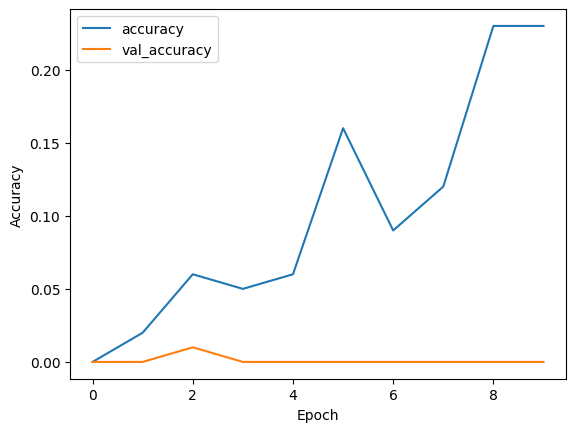

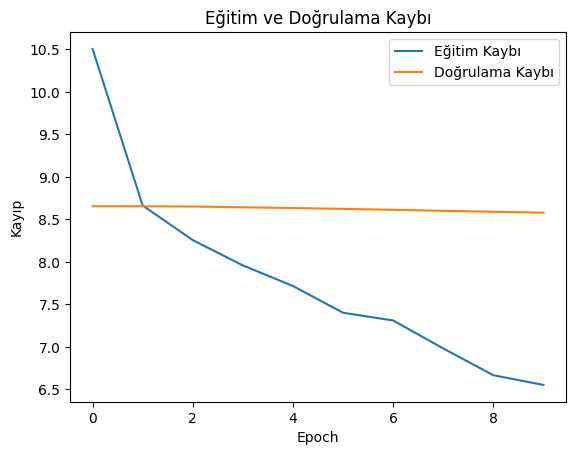

In [ ]:

import matplotlib.pyplot as plt

#CNN Modeli Özeti
print("CNN Model Özeti:")
model.summary();

# Eğitim sonuçlarını görselleştirme
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybını görselleştirme
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.show()

Bu kod bloğu, CNN modelinin özetini ve eğitim sonuçlarını görselleştirme işlemlerini içeriyor.Toplamda, modelde 7,166,878 (27.34 MB) parametre bulunmaktadır. Bu parametreler, ağı eğitmek için kullanılan ağırlıklar ve önyargılar içerir.

In [ ]:
import numpy as np

# Validation ve test veri setlerini numpy dizilerine dönüştürme
val_images_np = np.array(val_images)
val_labels_np = np.array(val_labels)
test_images_np = np.array(test_images)
test_labels_np = np.array(test_labels)

# Boyutları kontrol etme
print(f"Validation images shape: {val_images_np.shape}")
print(f"Validation labels shape: {val_labels_np.shape}")
print(f"Test images shape: {test_images_np.shape}")
print(f"Test labels shape: {test_labels_np.shape}")

# Validation ve test etiketlerinin örneklerini görüntüleyelim
print(f"Validation labels: {val_labels_np[:10]}")
print(f"Test labels: {test_labels_np[:10]}")

Validation images shape: (100, 64, 256, 1)
Validation labels shape: (100,)
Test images shape: (100, 64, 256, 1)
Test labels shape: (100,)
Validation labels: [274 203 163 134  62 249  52  86  42 245]
Test labels: [ 11  92  67 177  51 218 201 194 169  75]


Bu kod, validation ve test veri setlerini numpy dizilerine dönüştürmektedir. Ardından, bu dizilerin boyutları kontrol edilmekte ve birkaç örnek etiket görüntülenmektedir.
Validation images shape: (100, 64, 256, 1) - Doğrulama veri setinde 100 görüntü bulunmaktadır. Her bir görüntü, 64x256 piksel boyutundadır ve tek bir kanalı (siyah-beyaz) vardır.

Validation labels shape: (100,) - Doğrulama veri setinde 100 etiket bulunmaktadır. Etiketler, doğrulama görüntülerinin sınıf kimliklerini temsil eder.

Test images shape: (100, 64, 256, 1) - Test veri setinde de 100 görüntü bulunmaktadır. Boyutları doğrulama veri setiyle aynıdır.

Test labels shape: (100,) - Test veri setinde de 100 etiket bulunmaktadır.

Validation labels: İlk 10 doğrulama etiketini gösterir. Bu etiketler, doğrulama veri setindeki ilk 10 görüntünün sınıf kimliklerini temsil eder.

Test labels: İlk 10 test etiketini gösterir. Bu etiketler, test veri setindeki ilk 10 görüntünün sınıf kimliklerini temsil eder.
Bu çıktılar, veri setlerinin doğru şekilde yüklenip dönüştürüldüğünü ve etiketlerin uygun şekilde işlendiğini göstermektedir.

In [ ]:

def predict_and_display(model, images, labels, label_encoder, num_samples=5):
    for i in range(num_samples):
        img = images[i]
        true_label = labels[i]
        pred_prob = model.predict(img.reshape(1, IMG_HEIGHT, IMG_WIDTH, 1))
        pred_label = label_encoder.inverse_transform([np.argmax(pred_prob)])

        # Görüntüyü ve tahmini gösterme
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'True: {label_encoder.inverse_transform([true_label])[0]}, Pred: {pred_label[0]}')
        plt.show()

Bu fonksiyon, modelin verilen görüntüler üzerinde tahmin yapmasını ve gerçek ve tahmini etiketleri görüntülemesini sağlar. İşlevin adı predict_and_display olarak belirlenmiştir.Fonksiyon, belirtilen sayıda örnek için aşağıdaki işlemleri gerçekleştirir:

Görüntünün dizideki indeksini kullanarak gerçek etiketi alır.
Modeli kullanarak görüntü üzerinde tahmin yapar.
Tahmin edilen sınıfın olasılığını bulur ve en yüksek olasılığa sahip sınıfı seçer.
Gerçek ve tahmin edilen etiketleri görüntüler.
Sonuçlar, gerçek ve tahmin edilen etiketlerin yanı sıra görüntüyü de içeren bir şekilde görselleştirilir.

CNN Model Tahminleri (Rastgele Seçilen Örnekler):
1/1 [==============================] - 0s 34ms/step


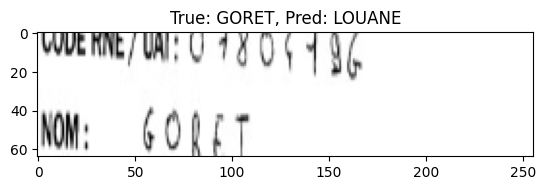

1/1 [==============================] - 0s 37ms/step


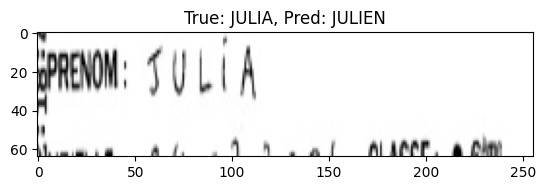

1/1 [==============================] - 0s 35ms/step


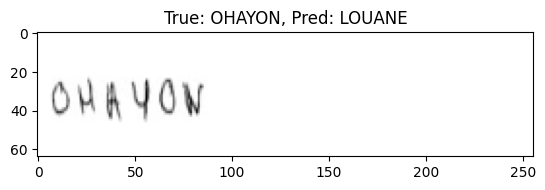

1/1 [==============================] - 0s 30ms/step


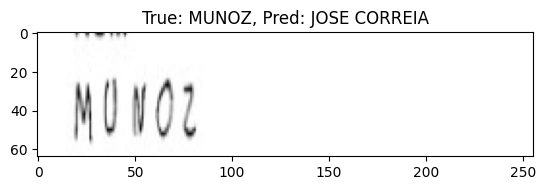

1/1 [==============================] - 0s 36ms/step


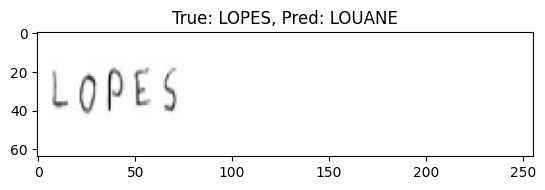

In [ ]:
import random
# Rastgele seçilecek örneklerin sayısı
num_samples = 5
# Rastgele test örneklerini seçme
random_indices = random.sample(range(len(test_images)), num_samples)
random_test_images = [test_images[i] for i in random_indices]
random_test_labels = [test_labels[i] for i in random_indices]

# Tahminleri gerçekleştirme ve gösterme
print("CNN Model Tahminleri (Rastgele Seçilen Örnekler):")
predict_and_display(model, random_test_images, random_test_labels, label_encoder, num_samples=num_samples)

Bu kod, test veri setinden rastgele örnekler seçer, bu örnekler üzerinde modelin tahminlerini gerçekleştirir ve gerçek ile tahmin edilen etiketleri görsel olarak görüntüler. Tahminler, belirtilen sayıda rastgele örnekleme için yapılır.